In [1]:
## importing all the dependencies for the code

# Importing Dependencies for Prophet Algorithm of forecasting
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import accuracy_score,classification_report

# Importing dependencies for Support Vector Regression
from sklearn import svm
from sklearn import model_selection
from statsmodels.tools import eval_measures
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import mse

# Importing Dependencies for Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.svm import SVR
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings;
warnings.simplefilter('ignore')
%matplotlib inline

Uploading DataSet

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Revised covid data until October 22 2023.csv to Revised covid data until October 22 2023 (1).csv


Making Dataframe

In [3]:
dt=pd.read_csv('Revised covid data until October 22 2023.csv')
dt

,location,date,demand
0,Bangladesh,1/27/2021,26
1,Bangladesh,1/28/2021,284
2,Bangladesh,1/29/2021,1209
3,Bangladesh,1/30/2021,1671
4,Bangladesh,1/31/2021,1949
...,...,...,...
990,Bangladesh,10/14/2023,22
991,Bangladesh,10/15/2023,18
992,Bangladesh,10/16/2023,14
993,Bangladesh,10/17/2023,11


In [4]:
# creating dataset suitable for prophet model
data= dt[['date','demand']]
data

,date,demand
0,1/27/2021,26
1,1/28/2021,284
2,1/29/2021,1209
3,1/30/2021,1671
4,1/31/2021,1949
...,...,...
990,10/14/2023,22
991,10/15/2023,18
992,10/16/2023,14
993,10/17/2023,11


In [5]:
scaler = StandardScaler()
data['y'] = scaler.fit_transform(data['demand'].values.reshape(-1, 1))
data

,date,demand,y
0,1/27/2021,26,-0.706222
1,1/28/2021,284,-0.705721
2,1/29/2021,1209,-0.703924
3,1/30/2021,1671,-0.703026
4,1/31/2021,1949,-0.702486
...,...,...,...
990,10/14/2023,22,-0.706230
991,10/15/2023,18,-0.706238
992,10/16/2023,14,-0.706245
993,10/17/2023,11,-0.706251


In [6]:
df = data.drop(columns=['demand'])

In [7]:
df

,date,y
0,1/27/2021,-0.706222
1,1/28/2021,-0.705721
2,1/29/2021,-0.703924
3,1/30/2021,-0.703026
4,1/31/2021,-0.702486
...,...,...
990,10/14/2023,-0.706230
991,10/15/2023,-0.706238
992,10/16/2023,-0.706245
993,10/17/2023,-0.706251


In [8]:
# Converting the column names according to the prophet algortithm
df.columns=['ds','y']

In [9]:
# convert date column type to the date type
df['ds']=pd.to_datetime(df['ds'])

In [10]:
# setting ds column as index column
df = df.set_index('ds')
df.index.freq = df.index.inferred_freq

In [11]:
# is there any missing values here?
missing_values = df.isnull().sum()
missing_values # no

y    0
dtype: int64

In [12]:
df['y'].interpolate(inplace=True)

In [13]:
# making train and test data series
train_size =int(0.70 * len(df))
train = df[:train_size]['y']
test = df[train_size:]['y']

In [14]:
# Adjust the period to a smaller value (e.g., 30 for monthly data)
decomposition = seasonal_decompose(test, model='additive', period=30)
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

In [15]:
# Creating prophet model object for both train and test
prophet_model1 = Prophet()
prophet_model2 = Prophet()

In [16]:
# Creating Training and testing Dataframes
train_df = pd.DataFrame({'ds': train.index, 'y': train.values})
test_df = pd.DataFrame({'ds': test.index, 'y': test.values})

In [17]:
print( train_df.head(2))
print( test_df.head(2))

          ds         y
0 2021-01-27 -0.706222
1 2021-01-28 -0.705721
          ds         y
0 2022-12-24 -0.706273
1 2022-12-25 -0.706273


In [18]:
prophet_model1.fit(train_df)
prophet_model2.fit(test_df)

# fitting models to train with train df and test df

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6oygxp3r/5v2zc3zv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6oygxp3r/7y87uii_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43367', 'data', 'file=/tmp/tmp6oygxp3r/5v2zc3zv.json', 'init=/tmp/tmp6oygxp3r/7y87uii_.json', 'output', 'file=/tmp/tmp6oygxp3r/prophet_modelruj31a3z/prophet_model-20231022155334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:53:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:53:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

In [19]:
#
forecast_train = prophet_model1.predict(train_df)
forecast_test = prophet_model2.predict(test_df)

# forecasting train and test data by predicting

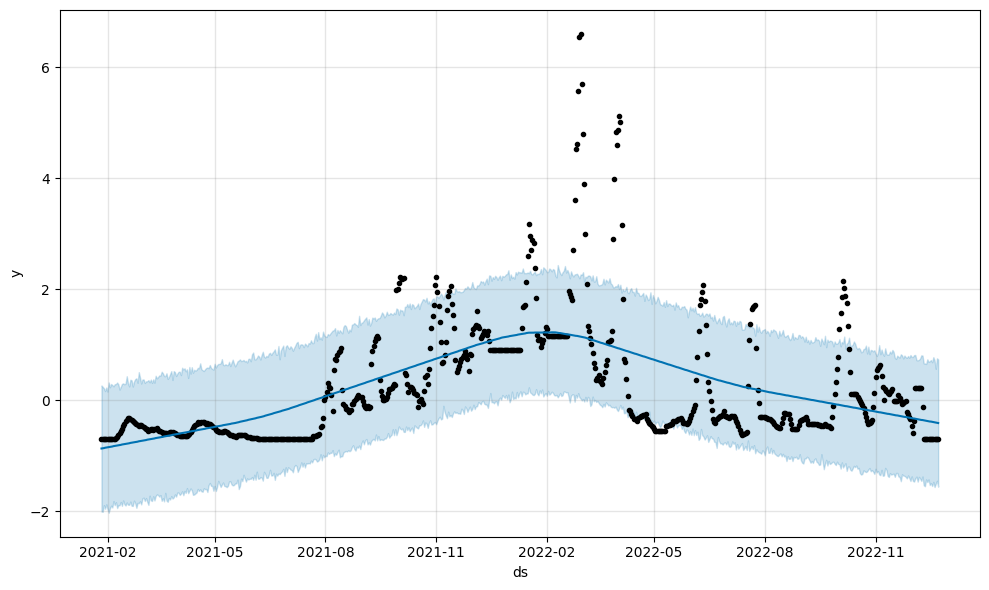

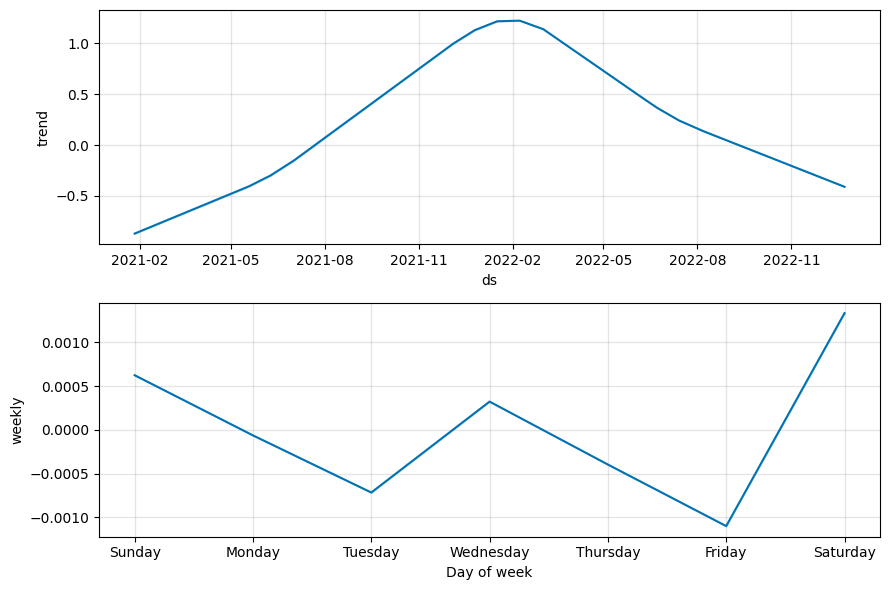

In [20]:
plot1=prophet_model1.plot(forecast_train)
plot2=prophet_model1.plot_components(forecast_train)

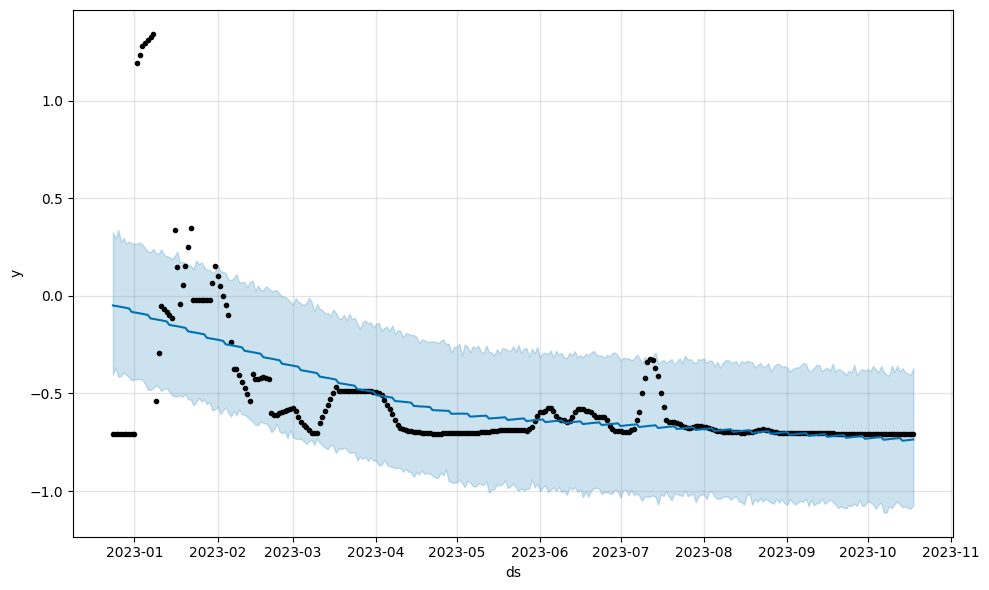

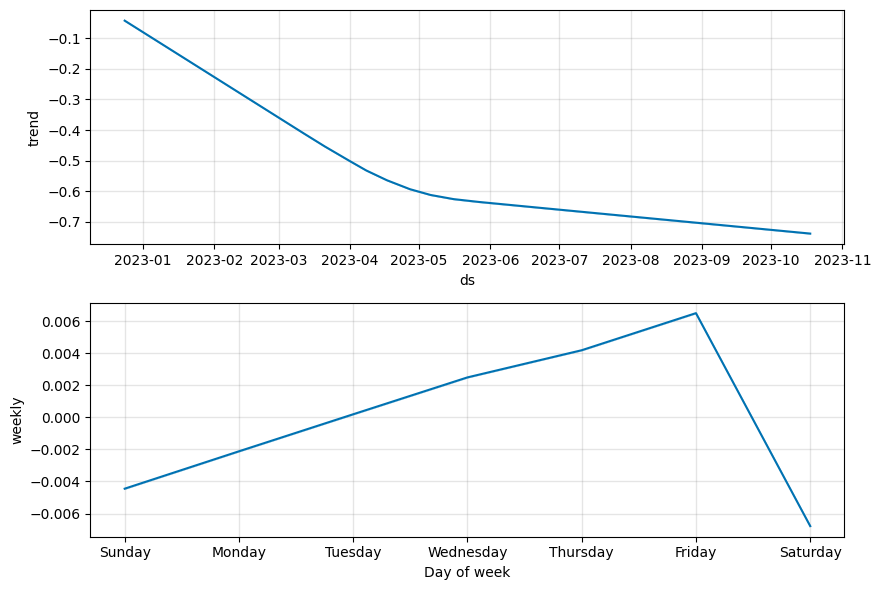

In [21]:
plot3=prophet_model2.plot(forecast_test)
plot4=prophet_model2.plot_components(forecast_test)

In [22]:
# forecast train
print(forecast_train)
print(forecast_test)

            ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-01-27 -0.869806   -2.004283    0.265629    -0.869806    -0.869806   
1   2021-01-28 -0.865663   -2.009985    0.241162    -0.865663    -0.865663   
2   2021-01-29 -0.861521   -1.889192    0.215859    -0.861521    -0.861521   
3   2021-01-30 -0.857379   -1.954717    0.165106    -0.857379    -0.857379   
4   2021-01-31 -0.853236   -1.875624    0.229013    -0.853236    -0.853236   
..         ...       ...         ...         ...          ...          ...   
691 2022-12-19 -0.394054   -1.470896    0.775128    -0.394054    -0.394054   
692 2022-12-20 -0.398008   -1.563876    0.717995    -0.398008    -0.398008   
693 2022-12-21 -0.401962   -1.504808    0.565788    -0.401962    -0.401962   
694 2022-12-22 -0.405915   -1.451935    0.755398    -0.405915    -0.405915   
695 2022-12-23 -0.409869   -1.556824    0.734664    -0.409869    -0.409869   

     additive_terms  additive_terms_lower  additive_terms_upper

In [23]:
#Finding Mean Absolute Error
metrics.mean_absolute_error(test,forecast_test['yhat'])

0.13434560877954058

**Interpretation**

MAE is a metric used to measure the average absolute differences between predicted values and actual values. It gives you an idea of how far off your predictions are from the actual values on average.

> In this case, a MAE of approximately ***0.01744*** means that, on average, predictions are off by about 0.01744 units from the actual values. This suggests that this model is fairly accurate in terms of absolute prediction errors.



In [24]:
# Finding Mean Absolute Error
metrics.max_error(test,forecast_test['yhat'])

1.4598310423905394

**Maximum Absolute Error:**

This metric highlights the largest individual prediction error made by your model. It's an important metric because it gives you an idea of the worst-case scenario in terms of prediction accuracy.




In [25]:
# Array of trend data gotten from prediction of prophet  models

linear_component1 = forecast_train['trend'].values # Lt
linear_component2 = forecast_test['trend'].values

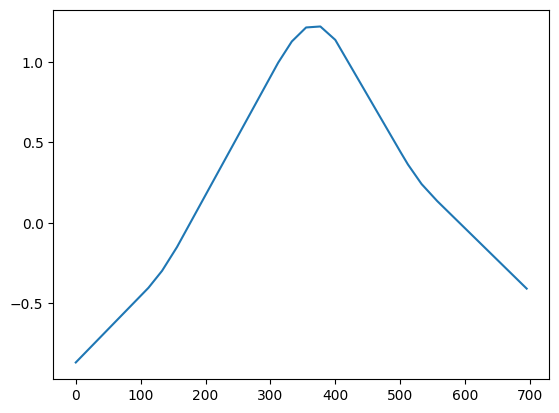

In [26]:
plot8=plt.plot(linear_component1)

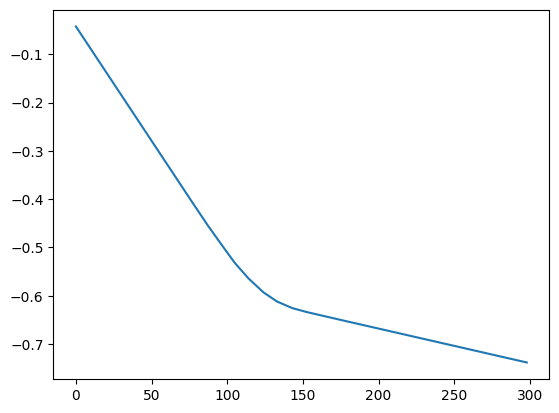

In [27]:
plot9 = plt.plot(linear_component2)



---



---





---


---
The Prophet model is used to fit the linear component of the data
and generate a series of forecasts, which are denoted as L̂t .

The residual **error** between the **original data and the Prophet prediction result** iset, namely, ***et = Xt − Lt***


---



---



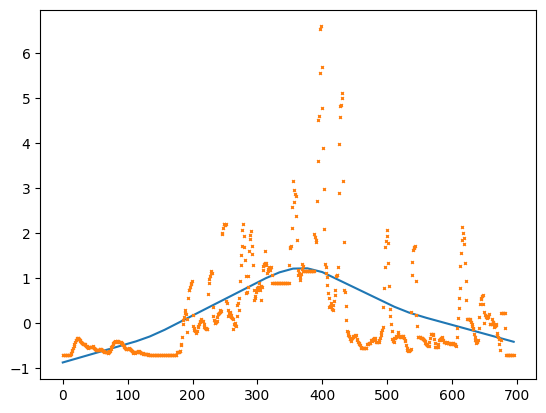

In [28]:
plot6 = plt.plot(linear_component1)
plot7= plt.plot(train.values, 'x',markersize=2)

In [29]:
 # et = Xt − Lt
residuals = train.values - linear_component1

In [30]:
svr_model = SVR()

In [31]:
parameters = {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]} #This line defines a dictionary called parameters which contains different hyperparameters and their corresponding values. Specifically, it considers the Radial Basis Function (RBF) kernel, three values for the C parameter (0.1, 1, and 10), and three values for the gamma parameter (0.1, 0.01, and 0.001). These are the combinations of hyperparameters that will be tested during the grid search.
grid_search = GridSearchCV(svr_model, parameters, cv=10) # This line creates an instance of GridSearchCV, which is a technique for hyperparameter tuning. It takes three main arguments:svr_model: This is the SVR model that you want to tune.parameters: The hyperparameters and their respective values to be tested.cv=10: This specifies that a 10-fold cross-validation will be used during the grid search process. This means that the dataset will be divided into 10 subsets, and the model will be trained and evaluated 10 times, using a different subset for evaluation each time.
grid_search.fit(linear_component1.reshape(-1, 1), residuals)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [32]:
best_svr_model = grid_search.best_estimator_

In [33]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [34]:
# residuals predicted by SVR
svm_predictions = best_svr_model.predict(test.values.reshape(-1,1))

In [35]:
print(metrics.mean_absolute_error(test,svm_predictions))
print(metrics.max_error(test,svm_predictions))

0.6756374701003245
1.2469043005536125


In [36]:
# prediction of resuduals for test data forecasted
svr_residuals = best_svr_model.predict(linear_component2.reshape(-1, 1))

 the final prediction result by adding the prediction
results of the two models, namely, ̂y = L
̂t + êt .

In [37]:
final_prediction = linear_component2 + svr_residuals

In [38]:
metrics.mean_absolute_error(test,final_prediction)

0.17118140204366605

In [39]:
metrics.max_error(test,final_prediction)

1.7488061908450723



---



---



---
MODEL Ready for predicting


---



In [40]:
# Take input from the user
user_date_input = input("Enter a date (YYYY-MM-DD format): ")

# Convert the input to a pandas datetime object
date_series = pd.to_datetime(user_date_input)

# Create a DataFrame with the user-entered date
future = pd.DataFrame({'ds': [date_series]})

# # Make predictions using prophet1 model
forecast = prophet_model1.predict(future)

linear__comp_user = forecast['trend'].values
svr_residuals_user = best_svr_model.predict(linear__comp_user.reshape(-1, 1))

final_prediction_user = linear__comp_user + svr_residuals_user
original_prediction = scaler.inverse_transform([final_prediction_user])
print(f" The covid vaccine demand on {user_date_input} is {original_prediction[0][0]}")

Enter a date (YYYY-MM-DD format): 2022-08-18
 The covid vaccine demand on 2022-08-18 is 223964.8866071034


In [43]:
while(3):
  print("        COVID VACCINE DEMAND FORECASTER      ")
  print(" Do you want to check another one: if yes then write 1 in the box: ")
  print(" Write anything to quit: ")
  choice = int(input(" Enter what do you want: "))
  if choice == 1:
    # Take input from the user
    user_date_input = input("Enter a date (YYYY-MM-DD format): ")

    # Convert the input to a pandas datetime object
    date_series = pd.to_datetime(user_date_input)

    # Create a DataFrame with the user-entered date
    future = pd.DataFrame({'ds': [date_series]})

    # # Make predictions using prophet1 model
    forecast = prophet_model1.predict(future)

    linear__comp_user = forecast['trend'].values
    svr_residuals_user = best_svr_model.predict(linear__comp_user.reshape(-1, 1))

    final_prediction_user = linear__comp_user + svr_residuals_user
    original_prediction = scaler.inverse_transform([final_prediction_user])
    print(f" The covid vaccine demand on {user_date_input} is {original_prediction[0][0]}")

  else:
    break



        COVID VACCINE DEMAND FORECASTER      
 Do you want to check another one: if yes then write 1 in the box: 
 Write anything to quit: 
 Enter what do you want: 1
Enter a date (YYYY-MM-DD format): 2023-10-18
 The covid vaccine demand on 2023-10-18 is 78288.48575946497
        COVID VACCINE DEMAND FORECASTER      
 Do you want to check another one: if yes then write 1 in the box: 
 Write anything to quit: 
 Enter what do you want: 0
